In [233]:
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
from tensorflow.keras.losses import Huber

In [234]:
tf.keras.utils.get_file("bike_sharing_dataset.zip","https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip",cache_dir=".",extract=True)

'.\\datasets\\bike_sharing_dataset.zip'

In [235]:
df=pd.read_csv('datasets/hour.csv',parse_dates={'datetime': ['dteday','hr']}, date_format='%Y-%m-%d %H',index_col='datetime')

In [236]:
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=17379, freq=None)

In [237]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,2,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,3,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,4,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,5,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [238]:
df.resample('H').mean()

zeros = ["casual","registered","cnt"]
inter = ["temp","atemp","hum","windspeed"]
repeat = ["holiday","weekday","workingday","weathersit"]

for column in zeros:
    df[column] = df[column].fillna(0)
    
for column in inter:
    df[column] = df[column].interpolate()
    
for column in repeat:
    df[column] = df[column].bfill()


In [239]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,2,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,3,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,4,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,5,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [240]:
df.notna().sum()

instant       17379
season        17379
yr            17379
mnth          17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

In [241]:
df[['casual','registered','cnt','weathersit']].describe()

,casual,registered,cnt,weathersit
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,35.676218,153.786869,189.463088,1.425283
std,49.305030,151.357286,181.387599,0.639357
min,0.000000,0.000000,1.000000,1.000000
25%,4.000000,34.000000,40.000000,1.000000
50%,17.000000,115.000000,142.000000,1.000000
75%,48.000000,220.000000,281.000000,2.000000
max,367.000000,886.000000,977.000000,4.000000


In [242]:
df.casual/=1e3 
df.registered/=1e3
df.cnt/=1e3
df.weathersit/=4

<AxesSubplot: xlabel='datetime'>

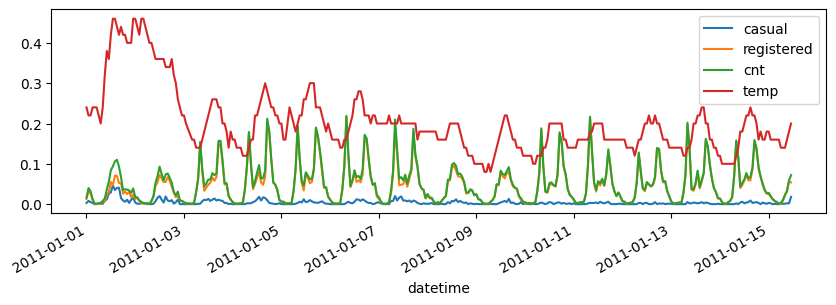

In [243]:
df_2weeks=df[:24*7*2]
df_2weeks[['casual','registered','cnt','temp']].plot(figsize=(10,3))

<AxesSubplot: xlabel='datetime'>

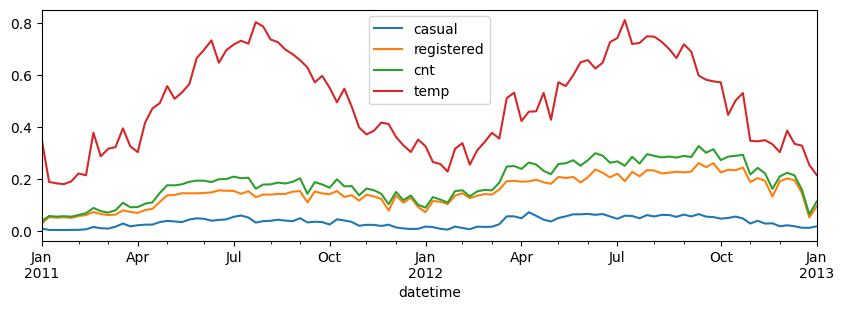

In [244]:
df_daily=df.resample('W').mean()
df_daily[['casual','registered','cnt','temp']].plot(figsize=(10,3))

In [245]:
#2.3
train_data = df[df.index.year < 2012]
test_data = df[df.index.year == 2012]

previous_day_predictions = test_data['cnt'].shift(24)

mae_daily = np.abs(test_data['cnt'] - previous_day_predictions).mean()

previous_week_predictions = test_data['cnt'].shift(24 * 7)
mae_weekly = np.abs(test_data['cnt'] - previous_week_predictions).mean()

mae_daily *= 1e3
mae_weekly *= 1e3

mae_baseline = (mae_daily, mae_weekly)
print(mae_baseline)
with open('mae_baseline.pkl', 'wb') as file:
    pickle.dump(mae_baseline, file)

(77.75143513203216, 71.8156665888396)


In [246]:
#2.4
cnt_train = df['cnt']['2011-01-01 00:00':'2012-06-30 23:00']
cnt_valid = df['cnt']['2012-07-01 00:00':]


In [247]:
seq_len = 1 * 24
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    cnt_train.to_numpy(),
    targets=cnt_train[seq_len:],
    sequence_length=seq_len,
    batch_size=32,
    shuffle=True,
    seed=42
    )
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    cnt_valid.to_numpy(),
    targets=cnt_valid[seq_len:],
    sequence_length=seq_len,
    batch_size=32
    )

In [248]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[seq_len])
    ])

In [249]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss=Huber(delta=1.0), metrics=['mae'])

history = model.fit(train_ds, epochs=20, validation_data=valid_ds)

Epoch 1/20
406/406 [==============================] - 2s 3ms/step - loss: 0.0384 - mae: 0.2074 - val_loss: 0.0479 - val_mae: 0.2386
Epoch 2/20
406/406 [==============================] - 1s 3ms/step - loss: 0.0179 - mae: 0.1449 - val_loss: 0.0288 - val_mae: 0.1813
Epoch 3/20
406/406 [==============================] - 1s 3ms/step - loss: 0.0115 - mae: 0.1138 - val_loss: 0.0201 - val_mae: 0.1477
Epoch 4/20
406/406 [==============================] - 1s 2ms/step - loss: 0.0084 - mae: 0.0957 - val_loss: 0.0155 - val_mae: 0.1272
Epoch 5/20
406/406 [==============================] - 1s 2ms/step - loss: 0.0067 - mae: 0.0844 - val_loss: 0.0128 - val_mae: 0.1142
Epoch 6/20
406/406 [==============================] - 1s 2ms/step - loss: 0.0057 - mae: 0.0770 - val_loss: 0.0111 - val_mae: 0.1058
Epoch 7/20
406/406 [==============================] - 1s 2ms/step - loss: 0.0050 - mae: 0.0717 - val_loss: 0.0099 - val_mae: 0.0998
Epoch 8/20
406/406 [==============================] - 1s 2ms/step - loss: 0.

In [250]:
mae = model.evaluate(valid_ds)

print("MAE:", mae)
with open('mae_linear.pkl', 'wb') as file:
    pickle.dump((mae,), file)
    
model.save('model_linear.h5')

136/136 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0740
MAE: [0.005662170238792896, 0.07402876764535904]


In [251]:
#2.5

model = tf.keras.Sequential([
tf.keras.layers.SimpleRNN(1, input_shape=[None, 1])
])


In [252]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.003, momentum=0.9),
              loss=Huber(delta=1.0), metrics=['mae'])

history = model.fit(train_ds, epochs=20, validation_data=valid_ds)

Epoch 1/20
406/406 [==============================] - 3s 5ms/step - loss: 0.0192 - mae: 0.1469 - val_loss: 0.0200 - val_mae: 0.1399
Epoch 2/20
406/406 [==============================] - 2s 5ms/step - loss: 0.0075 - mae: 0.0920 - val_loss: 0.0155 - val_mae: 0.1215
Epoch 3/20
406/406 [==============================] - 2s 4ms/step - loss: 0.0066 - mae: 0.0851 - val_loss: 0.0140 - val_mae: 0.1149
Epoch 4/20
406/406 [==============================] - 2s 4ms/step - loss: 0.0061 - mae: 0.0810 - val_loss: 0.0128 - val_mae: 0.1110
Epoch 5/20
406/406 [==============================] - 2s 4ms/step - loss: 0.0057 - mae: 0.0781 - val_loss: 0.0122 - val_mae: 0.1072
Epoch 6/20
406/406 [==============================] - 2s 4ms/step - loss: 0.0055 - mae: 0.0757 - val_loss: 0.0114 - val_mae: 0.1048
Epoch 7/20
406/406 [==============================] - 2s 4ms/step - loss: 0.0052 - mae: 0.0736 - val_loss: 0.0110 - val_mae: 0.1023
Epoch 8/20
406/406 [==============================] - 2s 5ms/step - loss: 0.

In [253]:
mae = model.evaluate(valid_ds)

print("MAE:", mae)
 
with open('mae_rnn1.pkl', 'wb') as file:
    pickle.dump((mae,), file)
model.save('model_rnn1.h5')

136/136 [==============================] - 0s 2ms/step - loss: 0.0081 - mae: 0.0864
MAE: [0.008107868954539299, 0.08639086037874222]


In [254]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=[None, 1]),
    tf.keras.layers.Dense(1, input_shape=[seq_len])
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.003, momentum=0.9),
              loss=Huber(delta=1.0), metrics=['mae'])

history = model.fit(train_ds, epochs=20, validation_data=valid_ds)

Epoch 1/20
406/406 [==============================] - 3s 5ms/step - loss: 0.0082 - mae: 0.0864 - val_loss: 0.0086 - val_mae: 0.0880
Epoch 2/20
406/406 [==============================] - 2s 5ms/step - loss: 0.0035 - mae: 0.0577 - val_loss: 0.0067 - val_mae: 0.0777
Epoch 3/20
406/406 [==============================] - 2s 5ms/step - loss: 0.0028 - mae: 0.0520 - val_loss: 0.0053 - val_mae: 0.0707
Epoch 4/20
406/406 [==============================] - 2s 6ms/step - loss: 0.0025 - mae: 0.0494 - val_loss: 0.0048 - val_mae: 0.0676
Epoch 5/20
406/406 [==============================] - 3s 6ms/step - loss: 0.0023 - mae: 0.0471 - val_loss: 0.0046 - val_mae: 0.0655
Epoch 6/20
406/406 [==============================] - 3s 6ms/step - loss: 0.0022 - mae: 0.0457 - val_loss: 0.0042 - val_mae: 0.0633
Epoch 7/20
406/406 [==============================] - 3s 6ms/step - loss: 0.0021 - mae: 0.0446 - val_loss: 0.0040 - val_mae: 0.0619
Epoch 8/20
406/406 [==============================] - 3s 7ms/step - loss: 0.

In [255]:
mae = model.evaluate(valid_ds)

print("MAE:", mae)
 
with open('mae_rnn32.pkl', 'wb') as file:
    pickle.dump((mae,), file)
model.save('model_rnn32.h5')

136/136 [==============================] - 1s 5ms/step - loss: 0.0029 - mae: 0.0525
MAE: [0.0029346360825002193, 0.05253628268837929]


In [256]:
#2.6
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=[None, 1], return_sequences=True),
    tf.keras.layers.SimpleRNN(32, input_shape=[None, 1], return_sequences=True),
    tf.keras.layers.SimpleRNN(32, input_shape=[None, 1]),
    tf.keras.layers.Dense(1, input_shape=[seq_len])
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.003, momentum=0.9),
              loss=Huber(delta=1.0), metrics=['mae'])

history = model.fit(train_ds, epochs=20, validation_data=valid_ds)

Epoch 1/20
406/406 [==============================] - 12s 19ms/step - loss: 0.0057 - mae: 0.0739 - val_loss: 0.0069 - val_mae: 0.0812
Epoch 2/20
406/406 [==============================] - 6s 14ms/step - loss: 0.0027 - mae: 0.0527 - val_loss: 0.0050 - val_mae: 0.0719
Epoch 3/20
406/406 [==============================] - 7s 16ms/step - loss: 0.0022 - mae: 0.0478 - val_loss: 0.0042 - val_mae: 0.0650
Epoch 4/20
406/406 [==============================] - 6s 14ms/step - loss: 0.0020 - mae: 0.0440 - val_loss: 0.0038 - val_mae: 0.0611
Epoch 5/20
406/406 [==============================] - 5s 13ms/step - loss: 0.0018 - mae: 0.0426 - val_loss: 0.0035 - val_mae: 0.0589
Epoch 6/20
406/406 [==============================] - 5s 13ms/step - loss: 0.0017 - mae: 0.0408 - val_loss: 0.0034 - val_mae: 0.0570
Epoch 7/20
406/406 [==============================] - 6s 15ms/step - loss: 0.0016 - mae: 0.0393 - val_loss: 0.0032 - val_mae: 0.0546
Epoch 8/20
406/406 [==============================] - 6s 15ms/step -

KeyboardInterrupt: 

In [ ]:
mae = model.evaluate(valid_ds)

print("MAE:", mae)
 
with open('mae_rnn_deep.pkl', 'wb') as file:
    pickle.dump((mae,), file)
model.save('model_rnn_deep.h5')

In [257]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,0,1,0,6,0,0.25,0.24,0.2879,0.81,0.0,0.003,0.013,0.016
2011-01-01 01:00:00,2,1,0,1,0,6,0,0.25,0.22,0.2727,0.80,0.0,0.008,0.032,0.040
2011-01-01 02:00:00,3,1,0,1,0,6,0,0.25,0.22,0.2727,0.80,0.0,0.005,0.027,0.032
2011-01-01 03:00:00,4,1,0,1,0,6,0,0.25,0.24,0.2879,0.75,0.0,0.003,0.010,0.013
2011-01-01 04:00:00,5,1,0,1,0,6,0,0.25,0.24,0.2879,0.75,0.0,0.000,0.001,0.001


In [258]:
data = df[['cnt', 'weathersit', 'atemp', 'holiday']]
data.head()

,cnt,weathersit,atemp,holiday
datetime,,,,
2011-01-01 00:00:00,0.016,0.25,0.2879,0
2011-01-01 01:00:00,0.040,0.25,0.2727,0
2011-01-01 02:00:00,0.032,0.25,0.2727,0
2011-01-01 03:00:00,0.013,0.25,0.2879,0
2011-01-01 04:00:00,0.001,0.25,0.2879,0


In [259]:
data_train = data['2011-01-01 00:00':'2012-06-30 23:00']
data_valid = data['2012-07-01 00:00':]

In [260]:
seq_len = 1 * 24
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    data_train.to_numpy(),
    targets=data_train[seq_len:],
    sequence_length=seq_len,
    batch_size=32,
    shuffle=True,
    seed=42
    )
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    data_valid.to_numpy(),
    targets=data_valid[seq_len:],
    sequence_length=seq_len,
    batch_size=32
    )

In [261]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 4), dtype=tf.float64, name=None), TensorSpec(shape=(None, 4), dtype=tf.float64, name=None))>

In [262]:
valid_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 4), dtype=tf.float64, name=None), TensorSpec(shape=(None, 4), dtype=tf.float64, name=None))>

In [263]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=[None, 4]),
    tf.keras.layers.Dense(1, input_shape=[seq_len])
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9),
              loss=Huber(delta=1.2), metrics=['mae'])

history = model.fit(train_ds, epochs=20, validation_data=valid_ds)

Epoch 1/20
387/406 [===========================>..] - ETA: 0s - loss: 0.0297 - mae: 0.1966

KeyboardInterrupt: 

In [ ]:
mae = model.evaluate(valid_ds)

print("MAE:", mae)
 
with open('mae_rnn_mv.pkl', 'wb') as file:
    pickle.dump((mae,), file)
    
model.save('model_rnn_mv.h5')